In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from elasticsearch import Elasticsearch
import re

import plotly.graph_objects as go

In [71]:
es = Elasticsearch()

In [72]:
TSA_reviews = pd.read_csv('/Users/shamalishinde/Desktop/US-election-2020-sentiment-analysis/datasets/heyjustin-1000.csv',index_col=0)

In [73]:
TSA_reviews.head()


,created_at,hashtags,location,text,user
0,2021-03-07 03:28:45,"[{'text': 'HeyJustin', 'indices': [14, 24]}]",chicagoland area,@syndrome22q1 #HeyJustin from a fellow Justin ...,agntdinozzo
1,2021-03-07 03:28:06,"[{'text': 'HeyJustin', 'indices': [12, 22]}]",NaN,@MaryLTrump #HeyJustin Hello Honey! Everyone i...,HowickHelen
2,2021-03-07 03:23:39,"[{'text': 'HeyJustin', 'indices': [14, 24]}]",NaN,@syndrome22q1 #HeyJustin saying hi from Cape C...,amstre
3,2021-03-07 02:23:05,"[{'text': 'HeyJustin', 'indices': [61, 71]}]","Toronto, Ontario","RT @Fuksoks: Comrades, please shoot a phat hel...",Landorcan
4,2021-03-07 02:07:59,[],Somewhere in Ohio,RT @syndrome22q1: - I have a disability whic...,bugfud


In [74]:
TSA_reviews['text'][25]


'RT @syndrome22q1: - I  have a  disability which is called 22q Syndrome  Even tho i am Different  i am curious to see how many people watchi…'

In [67]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [ ]:
# TSA_reviews['text'] = TSA_reviews['text'].apply(cleanTxt)
# TSA_reviews

In [77]:

TextBlob(TSA_reviews['text'][20]).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [76]:
def polarity(review):
    return TextBlob(review).sentiment.polarity

In [62]:
def subjectivity(review):
    return TextBlob(review).sentiment.subjectivity

In [63]:
TSA_reviews['polarity'] = TSA_reviews['text'].apply(polarity)


In [64]:
TSA_reviews.head()


,created_at,hashtags,location,text,user,polarity,subjectivity,Expression
1,2021-03-07 03:28:06,"[{'text': 'HeyJustin', 'indices': [12, 22]}]",NaN,HeyJustin Hello Honey! Everyone is entitled t...,HowickHelen,1.000000,1.00,Positive
4,2021-03-07 02:07:59,[],Somewhere in Ohio,22q1: - I have a disability which is called ...,bugfud,0.133333,0.70,Positive
6,2021-03-07 01:46:55,"[{'text': 'HeyJustin', 'indices': [47, 57]}]","California, USA",22q1: I AM HAPPY TO ANNOUNCE THAT HeyJustin ...,BernadetteMuoz2,0.800000,1.00,Positive
11,2021-03-07 01:31:22,"[{'text': 'HeyJustin', 'indices': [17, 27]}]",NaN,"14: HeyJustin, hope your having a great day.",AngelaDobbins12,0.800000,0.75,Positive
13,2021-03-07 01:08:27,[],NaN,22q1: - I have a disability which is called ...,LisaRod16739103,0.133333,0.70,Positive


In [23]:
TSA_reviews['subjectivity'] = TSA_reviews['text'].apply(subjectivity)

In [24]:
TSA_reviews.head()


,created_at,hashtags,location,text,user,polarity,subjectivity
0,2021-03-07 03:28:45,"[{'text': 'HeyJustin', 'indices': [14, 24]}]",chicagoland area,@syndrome22q1 #HeyJustin from a fellow Justin ...,agntdinozzo,0.000000,0.0
1,2021-03-07 03:28:06,"[{'text': 'HeyJustin', 'indices': [12, 22]}]",NaN,@MaryLTrump #HeyJustin Hello Honey! Everyone i...,HowickHelen,1.000000,1.0
2,2021-03-07 03:23:39,"[{'text': 'HeyJustin', 'indices': [14, 24]}]",NaN,@syndrome22q1 #HeyJustin saying hi from Cape C...,amstre,0.000000,0.0
3,2021-03-07 02:23:05,"[{'text': 'HeyJustin', 'indices': [61, 71]}]","Toronto, Ontario","RT @Fuksoks: Comrades, please shoot a phat hel...",Landorcan,0.000000,0.0
4,2021-03-07 02:07:59,[],Somewhere in Ohio,RT @syndrome22q1: - I have a disability whic...,bugfud,0.133333,0.7


In [25]:
TSA_reviews['Expression'] = np.where(TSA_reviews['polarity']>0,'Positive','Negative')
TSA_reviews.loc[TSA_reviews.polarity == 0, 'Expression'] = 'Netural'
TSA_reviews.head()


,created_at,hashtags,location,text,user,polarity,subjectivity,Expression
0,2021-03-07 03:28:45,"[{'text': 'HeyJustin', 'indices': [14, 24]}]",chicagoland area,@syndrome22q1 #HeyJustin from a fellow Justin ...,agntdinozzo,0.000000,0.0,Netural
1,2021-03-07 03:28:06,"[{'text': 'HeyJustin', 'indices': [12, 22]}]",NaN,@MaryLTrump #HeyJustin Hello Honey! Everyone i...,HowickHelen,1.000000,1.0,Positive
2,2021-03-07 03:23:39,"[{'text': 'HeyJustin', 'indices': [14, 24]}]",NaN,@syndrome22q1 #HeyJustin saying hi from Cape C...,amstre,0.000000,0.0,Netural
3,2021-03-07 02:23:05,"[{'text': 'HeyJustin', 'indices': [61, 71]}]","Toronto, Ontario","RT @Fuksoks: Comrades, please shoot a phat hel...",Landorcan,0.000000,0.0,Netural
4,2021-03-07 02:07:59,[],Somewhere in Ohio,RT @syndrome22q1: - I have a disability whic...,bugfud,0.133333,0.7,Positive


In [52]:
import json
import pyes
tmp = TSA_reviews.to_json(orient = "records")

df_json= json.loads(tmp)

for doc in df_json:
    es.index(index="sentiment",doc_type="test-type", id=i, body=doc)
    i=i+1


/opt/anaconda3/lib/python3.7/site-packages/elasticsearch/connection/base.py:190: ElasticsearchDeprecationWarning:

[types removal] Specifying types in document index requests is deprecated, use the typeless endpoints instead (/{index}/_doc/{id}, /{index}/_doc, or /{index}/_create/{id}).



In [ ]:
TSA_reviews.shape

In [ ]:
def exp_graph(reviews,title):   
    group = reviews.groupby('Expression').count()
    Pol_count = list(group['polarity'])
    Exp = list(group.index)

    group_list = list(zip(Pol_count,Exp))

    df = pd.DataFrame(group_list, columns=['Pol_count','Exp'])

    df['color'] = 'rgb(14,185,54)'
    df.loc[df.Exp == 'Netural', 'color'] = 'rgb(18,29,31)'
    df.loc[df.Exp == 'Negative', 'color'] = 'rgb(206,31,31)'
    
    go.Figure(go.Bar(x=df['Pol_count'],
                    y=df['Exp'],orientation='h',
                    marker={'color':df['color']})).update_layout(title_text=title).show()

In [ ]:
exp_graph(TSA_reviews,'Review Analysis')


In [27]:
TSA_reviews[TSA_reviews['polarity']==0].shape


(303, 8)

In [28]:
TSA_reviews.drop((TSA_reviews[TSA_reviews['polarity']==0]).index, inplace=True)
print(TSA_reviews.shape)


(697, 8)


In [29]:
def balanced_data(reviews,n):
    np.random.seed(10)
    drop = np.random.choice(reviews.index,n,replace=False)
    review_subset = reviews.drop(drop)
    return review_subset

In [30]:
TSA_subset = balanced_data(TSA_reviews,0)
print(TSA_subset.shape)


(697, 8)


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='polarity', ylabel='Density'>

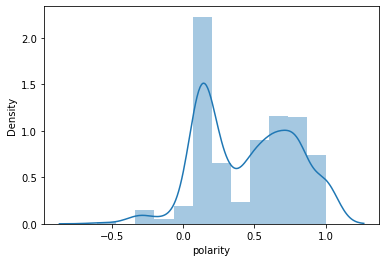

In [31]:
sns.distplot(TSA_subset['polarity'])


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='polarity'>

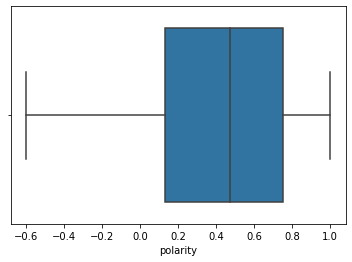

In [32]:
sns.boxplot(TSA_subset['polarity'])


697


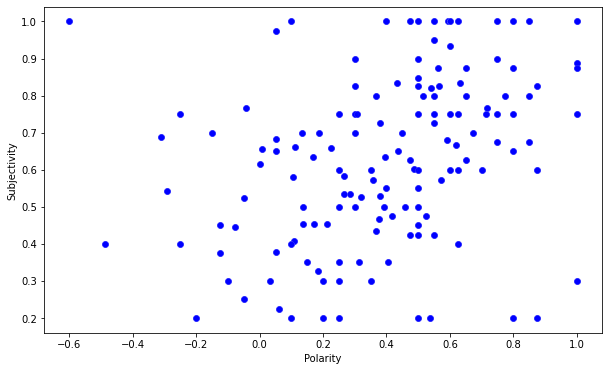

In [36]:
import matplotlib.pyplot as plt

print(TSA_reviews.shape[0])
df=TSA_reviews
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(0, df.shape[0]):
    ax.scatter(x = df["polarity"], y = df['subjectivity'],color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

plt.show()

In [37]:
TSA_subset.groupby('Expression').count()


,created_at,hashtags,location,text,user,polarity,subjectivity
Expression,,,,,,,
Negative,24,24,17,24,24,24,24
Positive,673,673,457,673,673,673,673


In [38]:
def pol_percent(subset,total):
    neg_percent = ((subset.groupby('Expression').count())['polarity'][0]/total)*100
    pos_percent = ((subset.groupby('Expression').count())['polarity'][1]/total)*100
    
    return neg_percent,pos_percent

In [39]:
tsa_pol_percent = pol_percent(TSA_subset,TSA_subset.shape[0])

print(tsa_pol_percent)

(3.443328550932568, 96.55667144906744)


In [40]:
def neg_replies(replies,title):

    most_pos_text = replies[replies['polarity'] == -1].text.head()

    most_pos_pol = replies[replies['polarity'] == -1].polarity.head()

    go.Figure(data=[go.Table(columnorder=[1,2],
                             columnwidth=[10,100],
                             header={'values':['Polarity',title],'align':'left'},
                             cells ={'values':[most_pos_pol,most_pos_text],'align':'left'}
                            )]).update_layout(title_text=title).show()

In [41]:
neg_replies(TSA_subset,'Most negative replies')


/opt/anaconda3/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [42]:
def pos_replies(replies,title):

    most_pos_text = replies[replies['polarity'] == 1].text.head()

    most_pos_pol = replies[replies['polarity'] == 1].polarity.head()

    go.Figure(data=[go.Table(columnorder=[1,2],
                             columnwidth=[10,100],
                             header={'values':['Polarity',title],'align':'left'},
                             cells ={'values':[most_pos_pol,most_pos_text],'align':'left'}
                            )]).update_layout(title_text=title).show()


In [43]:
pos_replies(TSA_subset,'Most positive replies')


In [44]:
def wordcloud(data,title):
    text = str(data.text)
    wc = WordCloud(max_font_size=100,max_words=500,scale=10,relative_scaling=0.6,background_color='white').generate(text)

    plt.figure(figsize=(15,10))
    plt.title(title,{'fontsize':30,'family':'serif'})
    plt.axis('off')
    plt.imshow(wc)

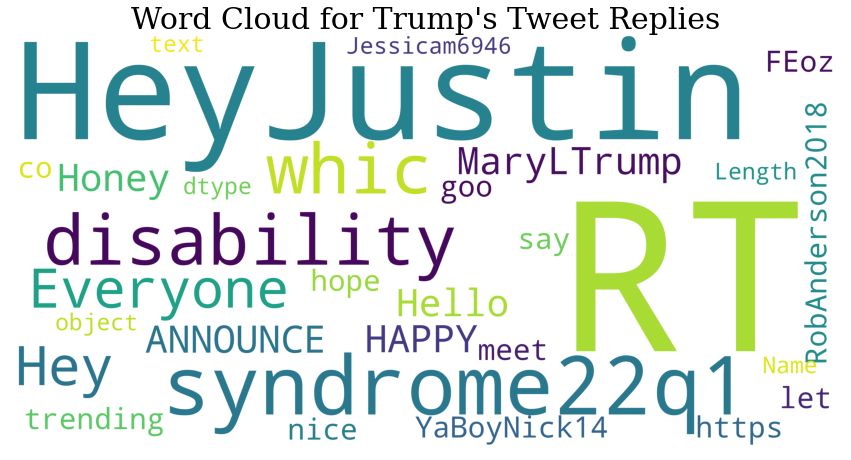

In [45]:
wordcloud(TSA_subset,'Word Cloud for Trump\'s Tweet Replies')
